# Data exploration Shared Task

In [39]:
import json
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Load the data from a JSONL file to a DF

df = pd.read_json("semeval_2026_task_11/train_data/train_data.json")

print(f"Dataset shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print(f"Duplicates: {len(df[df.duplicated()])}")

# Check ID uniqueness
print(f"Unique IDs: {df['id'].nunique() == len(df)}")

df.head()

Dataset shape: (960, 4)

Data types:
 id              object
syllogism       object
validity          bool
plausibility      bool
dtype: object

Missing values:
 id              0
syllogism       0
validity        0
plausibility    0
dtype: int64
Duplicates: 0
Unique IDs: True


,id,syllogism,validity,plausibility
0,50146f21-d265-4e3a-8d93-8165cdbe89a3,All cars are a type of vehicle. No animal is a...,False,True
1,dfafb4f6-4e1d-4cd5-aeb4-75d36aafdf1a,Nothing that is a soda is a juice. A portion o...,True,True
2,e30b1f83-a4c3-49cb-8aaf-5f64208c625b,Everything that is a planet is a celestial bod...,False,False
3,a30e07d5-0fb3-4097-9892-4b145b0c54f5,Every cat is an invisible creature. A number o...,True,False
4,5b8161b7-b1bf-4e16-a854-cd52cdce8a1b,There are no capital cities which are oceans. ...,True,True


In [41]:
# Basic stats
print(f"Total samples: {len(df)}")
print("Validity distribution:")
print(df['validity'].value_counts(normalize=True))
print("Plausibility distribution:")
print(df['plausibility'].value_counts(normalize=True))


# Syllogism length and parsing
df['length'] = df['syllogism'].str.len()
print(f"Avg length: {df['length'].mean():.2f}")

Total samples: 960
Validity distribution:
validity
False    0.5
True     0.5
Name: proportion, dtype: float64
Plausibility distribution:
plausibility
False    0.50625
True     0.49375
Name: proportion, dtype: float64
Avg length: 134.54


In [42]:
# Table showing validity vs plausibility
validity_plausibility_table = pd.crosstab(df['validity'], df['plausibility'], normalize='index')
print("Validity vs Plausibility:")
validity_plausibility_table

Validity vs Plausibility:


plausibility,False,True
validity,,
False,0.5125,0.4875
True,0.5000,0.5000


In [43]:
# Split the syllogism into parts
df[['P1', 'P2', 'C']] = df['syllogism'].str.split('.', n=2, expand=True)
df.head()

,id,syllogism,validity,plausibility,length,P1,P2,C
0,50146f21-d265-4e3a-8d93-8165cdbe89a3,All cars are a type of vehicle. No animal is a...,False,True,90,All cars are a type of vehicle,No animal is a car,"Therefore, no animal can be a vehicle."
1,dfafb4f6-4e1d-4cd5-aeb4-75d36aafdf1a,Nothing that is a soda is a juice. A portion o...,True,True,155,Nothing that is a soda is a juice,A portion of the things that are beverages ar...,The only logical conclusion is that some beve...
2,e30b1f83-a4c3-49cb-8aaf-5f64208c625b,Everything that is a planet is a celestial bod...,False,False,140,Everything that is a planet is a celestial body,Anything that is a sun is a celestial body,There exists at least one sun that is a planet.
3,a30e07d5-0fb3-4097-9892-4b145b0c54f5,Every cat is an invisible creature. A number o...,True,False,115,Every cat is an invisible creature,A number of cats are animals,"Consequently, a portion of animals are invisi..."
4,5b8161b7-b1bf-4e16-a854-cd52cdce8a1b,There are no capital cities which are oceans. ...,True,True,167,There are no capital cities which are oceans,A select few large cities are classified as c...,"Therefore, it is clear that some large cities..."


In [44]:
# Get the most common words in premises and conclusions
def get_most_common_words(text_series, n=10):
    words = ' '.join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)
print("Most common words in Premise 1:", most_common_p1 := get_most_common_words(df['P1']))
print("Most common words in Premise 2:", most_common_p2 := get_most_common_words(df['P2']))
print("Most common words in Conclusion:", most_common_c := get_most_common_words(df['C']))

Most common words in Premise 1: [('is', 999), ('a', 734), ('that', 572), ('are', 528), ('There', 221), ('Every', 216), ('no', 208), ('single', 185), ('of', 145), ('an', 124)]
Most common words in Premise 2: [('are', 710), ('is', 697), ('a', 515), ('that', 459), ('of', 195), ('There', 195), ('Every', 166), ('single', 160), ('no', 136), ('It', 112)]
Most common words in Conclusion: [('are', 727), ('that', 662), ('some', 424), ('is', 406), ('not', 331), ('a', 303), ('It', 267), ('no', 156), ('of', 150), ('Therefore,', 146)]


In [45]:
# Filter out stopwords of the most common words
import nltk
stopwords = set(nltk.corpus.stopwords.words("english")) 

def get_most_common_words_no_stopwords(text_series, n=10):
    words = ' '.join(text_series).split()
    words = [word for word in words if word.lower() not in stopwords]
    counter = Counter(words)
    return counter.most_common(n)

filtered_most_common_p1 = get_most_common_words_no_stopwords(df['P1'])
filtered_most_common_p2 = get_most_common_words_no_stopwords(df['P2'])
filtered_most_common_c = get_most_common_words_no_stopwords(df['C'])
print("Filtered most common words in Premise 1:", filtered_most_common_p1)
print("Filtered most common words in Premise 2:", filtered_most_common_p2)
print("Filtered most common words in Conclusion:", filtered_most_common_c)

Filtered most common words in Premise 1: [('Every', 216), ('single', 185), ('Anything', 114), ('animal', 86), ('mammal', 77), ('also', 63), ('fish', 61), ('true', 58), ('animals', 46), ('dog', 46)]
Filtered most common words in Premise 2: [('Every', 166), ('single', 160), ('also', 107), ('animals', 60), ('Anything', 59), ('things', 58), ('fish', 55), ('animal', 51), ('true', 50), ('mammal', 43)]
Filtered most common words in Conclusion: [('Therefore,', 146), ('follows', 133), ('Consequently,', 97), ('case', 97), ('every', 88), ('must', 60), ('mammals.', 55), ('means', 46), ('single', 44), ('animals.', 43)]


Notes:

In Bertolazzi et al. (2024) syllogisms only had specific forms. In this data this is not the case. For example (I) "Some A are B" can be in the form "A number of A are B". 

In [46]:
import re

# Since not all premises contain the syllogism quantifiers we cannot use them
# We can try to identify the mood based on keywords in the premises
# Mapping of quantifiers to moods
# Note: This is a simplified approach and may not cover all cases
quantifiers = {
    'A': ['all', 'every', 'each'],
    'E': ['no', 'none', 'never'],
    'I': ['some', 'a number of', 'a few', 'many', 'several'], # Note: I came up with some of these myself,
    'O': ['not all', r'some.*not']  # Regex for "some ... not"
}

def premise_to_mood(premise):

    premise = premise.lower()
    for mood, words in quantifiers.items():
        for word in words:
            if word in premise or (mood == 'O' and re.search(word, premise)):
                return mood
    return None

In [47]:
# Check if we can determine the mood for both premises
df['P1_mood'] = df['P1'].apply(premise_to_mood)
df['P2_mood'] = df['P2'].apply(premise_to_mood)
df['C_mood'] = df['C'].apply(premise_to_mood)

# Check how many moods we could determine
print(f"Mood determined for P1: {df['P1_mood'].notnull().mean():.2%}")
print(f"Mood determined for P2: {df['P2_mood'].notnull().mean():.2%}")
print(f"Mood determined for C: {df['C_mood'].notnull().mean():.2%}")

# Most common moods
print("Most common moods in P1:", df['P1_mood'].value_counts())
print("Most common moods in P2:", df['P2_mood'].value_counts())
print("Most common moods in C:", df['C_mood'].value_counts())

# How many rows have both moods determined
df_mood = df.dropna(subset=['P1_mood', 'P2_mood'])
print(f"Rows with both moods determined: {len(df_mood)} ({len(df_mood)/len(df):.2%})")

# Rows without any mood
df_no_mood = df[df['P1_mood'].isnull() & df['P2_mood'].isnull() & df['C_mood'].isnull()]
print(f"Rows without any mood: {len(df_no_mood)} ({len(df_no_mood)/len(df):.2%})")

# Rows with only one mood
df_one_mood = df[(df['P1_mood'].isnull()) ^ (df['P2_mood'].isnull()) ^ (df['C_mood'].isnull())]
print(f"Rows with only one mood: {len(df_one_mood)} ({len(df_one_mood)/len(df):.2%})")

# Mood combinations
df_mood['mood_combination'] = df_mood['P1_mood'] + df_mood['P2_mood'] + df_mood['C_mood']
print("Most common mood combinations:", df_mood['mood_combination'].value_counts())

Mood determined for P1: 83.54%
Mood determined for P2: 83.33%
Mood determined for C: 93.85%
Most common moods in P1: P1_mood
E    376
A    350
I     76
Name: count, dtype: int64
Most common moods in P2: P2_mood
A    372
E    295
I    133
Name: count, dtype: int64
Most common moods in C: C_mood
E    474
A    218
I    209
Name: count, dtype: int64
Rows with both moods determined: 666 (69.38%)
Rows without any mood: 1 (0.10%)
Rows with only one mood: 281 (29.27%)
Most common mood combinations: mood_combination
EAE    105
AEE     93
EEE     60
AAA     57
EIE     32
AAE     28
IAI     28
EEI     28
AAI     27
EAA     24
EAI     17
AIA     16
AII     16
AEA     14
EIA     14
EEA     12
EII     12
AEI      9
IAA      8
III      7
IIE      6
IEE      6
AIE      5
IEI      4
IIA      2
IEA      2
Name: count, dtype: int64


/tmp/ipykernel_20212/2878686517.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mood['mood_combination'] = df_mood['P1_mood'] + df_mood['P2_mood'] + df_mood['C_mood']


In [48]:
# See if there is a correlation between mood combinations and validity/plausibility
mood_validity_table = pd.crosstab(df_mood['mood_combination'], df_mood['validity'], normalize='index')
print("Mood combination vs Validity:")
mood_validity_table

Mood combination vs Validity:


validity,False,True
mood_combination,,
AAA,0.859649,0.140351
AAE,0.607143,0.392857
AAI,0.370370,0.629630
AEA,0.785714,0.214286
AEE,0.376344,0.623656
AEI,0.333333,0.666667
AIA,0.937500,0.062500
AIE,0.600000,0.400000
AII,0.375000,0.625000


In [49]:
# Mood combination vs Plausibility
mood_plausibility_table = pd.crosstab(df_mood['mood_combination'], df_mood['plausibility'], normalize='index')
print("Mood combination vs Plausibility:")
mood_plausibility_table

Mood combination vs Plausibility:


plausibility,False,True
mood_combination,,
AAA,0.596491,0.403509
AAE,0.464286,0.535714
AAI,0.444444,0.555556
AEA,0.500000,0.500000
AEE,0.526882,0.473118
AEI,0.333333,0.666667
AIA,0.375000,0.625000
AIE,1.000000,0.000000
AII,0.250000,0.750000


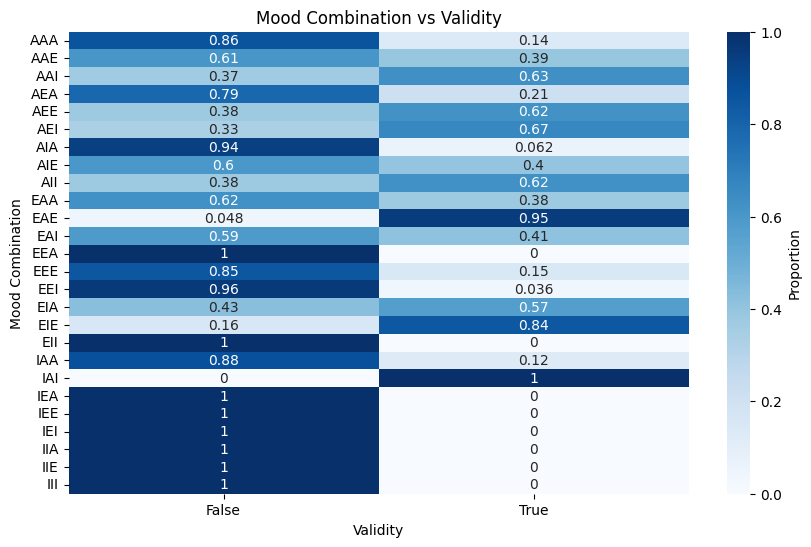

In [50]:
# Visualization of mood combinations vs validity
plt.figure(figsize=(10, 6))
sns.heatmap(mood_validity_table, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Mood Combination vs Validity')
plt.xlabel('Validity')
plt.ylabel('Mood Combination')
plt.show()

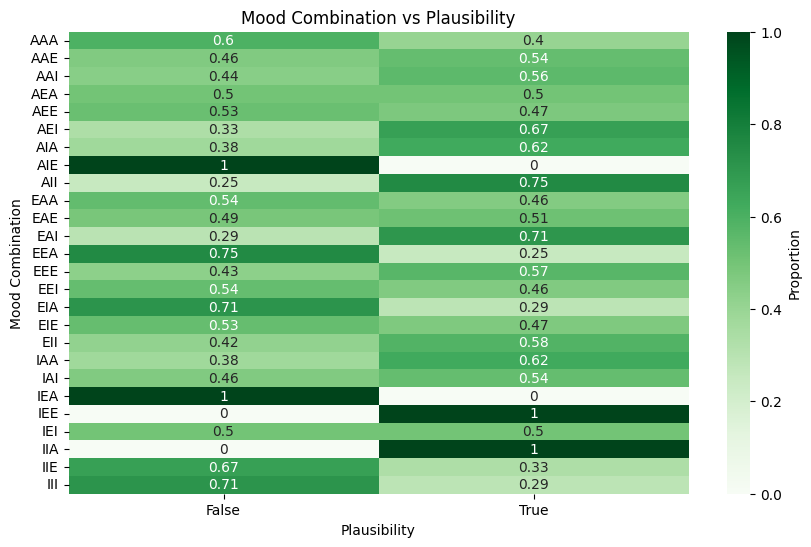

In [51]:
# Visualization for plausibility
plt.figure(figsize=(10, 6))
sns.heatmap(mood_plausibility_table, annot=True, cmap='Greens',
            cbar_kws={'label': 'Proportion'})
plt.title('Mood Combination vs Plausibility')
plt.xlabel('Plausibility')
plt.ylabel('Mood Combination')
plt.show()

In [52]:

quantifiers = ['all', 'no', 'some', 'not all', 'every']
for q in quantifiers:
    df[f'has_{q}'] = df['syllogism'].str.contains(q, case=False, regex=False)
print(df[[f'has_{q}' for q in quantifiers]].sum())

# Check if every syllogism has at least one quantifier
print("All syllogisms have at least one quantifier: ", end="")
print((df[[f'has_{q}' for q in quantifiers]].sum(axis=1) > 0).all())


# Show how many syllogisms do not have a quantifier
syllogisms_with_no_q = (df[[f'has_{q}' for q in quantifiers]].sum(axis=1) == 0).sum()
print("Number of syllogisms without a quantifier:", syllogisms_with_no_q)

# Check that both premisies have a quantifier
def has_quantifier(p):
    return any(q in p.lower() for q in quantifiers)
df['P1_has_q'] = df['P1'].apply(has_quantifier)
df['P2_has_q'] = df['P2'].apply(has_quantifier)
print("P1 without quantifier:", (~df['P1_has_q']).sum())
print("P2 without quantifier:", (~df['P2_has_q']).sum())
print("All syllogisms have quantifiers in both premises: ", end="")
print((df['P1_has_q'] & df['P2_has_q']).all())

has_all        271
has_no         682
has_some       515
has_not all     13
has_every      492
dtype: int64
All syllogisms have at least one quantifier: False
Number of syllogisms without a quantifier: 2
P1 without quantifier: 181
P2 without quantifier: 208
All syllogisms have quantifiers in both premises: False


Notes:

I think it's strange that of AA 0.66 is invalid because 2/3 AA-x syllogisms have a valid conclusion to them. Or is this because the conclusion is not valid for the given premise? Because then for example AA1 -> NVC would have validity false because it should be Aac, Iac, Ica

In [53]:
# View some examples of AA syllogisms with validity false
print("Examples of AA syllogisms with validity false:")
df[(df['P1_mood'] == 'A' ) & (df['P2_mood'] == 'A') & (df['validity'] == False)][['syllogism', 'validity', 'plausibility']].head(10)

Examples of AA syllogisms with validity false:


,syllogism,validity,plausibility
7,Every single cat is an animal. Anything that c...,False,False
12,Every single car is a vehicle. Everything that...,False,True
15,Every insect is an animal. All mammals are ani...,False,False
17,It is not the case that every human is a male....,False,False
65,Every single animal is a living thing. Everyth...,False,True
78,Every tiger is a feline. All tigers are also m...,False,False
79,It is not the case that every single scientist...,False,False
97,Every single fruit is a thing that grows on tr...,False,True
98,Every airplane is a cloud. It is true that eve...,False,False
123,All of the things that are lions are felines. ...,False,True


Since not all premises contain the syllogism quantifiers we cannot use them